# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# import citypy
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_information = {}
verified_cities = []

city_number = []
city_name = []
temperature = []
humidity = []
max_temp = []
lat = []
lon = []
cloudiness = []
wind_speed= []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_json = requests.get(query_url).json()
   
    try: 
        city_number.append(weather_json['id'])  
        city_name.append(weather_json['name'])
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
       
        print(f'{city_name} city with city number {city_number}, on the day of 9/22/19 temperature is {temperature}')
    except:
        pass
    
    
    




['Srivardhan'] city with city number [1255619], on the day of 9/22/19 temperature is [297.8]
['Srivardhan', 'Rafai'] city with city number [1255619, 236524], on the day of 9/22/19 temperature is [297.8, 293.8]
['Srivardhan', 'Rafai', 'Ushuaia'] city with city number [1255619, 236524, 3833367], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15]
['Srivardhan', 'Rafai', 'Ushuaia', 'Boden'] city with city number [1255619, 236524, 3833367, 606531], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15, 273.15]
['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown'] city with city number [1255619, 236524, 3833367, 606531, 2069194], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15, 273.15, 283.7]
['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15, 273.15, 283.7, 293.49]
['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372707], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15, 273.15, 283.7, 293.49, 290.15, 294.72, 297.6, 295.26, 286.63, 300.4, 290.93, 291.52, 275.55, 289.99, 295.29, 302.78, 285.81, 286.2, 287.04, 293.2, 277.2, 296.4]
['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Ma

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372707, 2173125, 2013375, 2068110, 2163355, 2175403, 6320062, 4035715, 1106677, 1163905, 6170031, 4030556], on the day of 9/22/19 temperature is [297.8, 293.8, 280.15, 273.15, 283.7, 293.49, 290.15, 294.72, 297.6, 295.26, 286.63, 300.4, 290.93, 291.52, 275.55, 289.99, 295.29, 302.78, 285.81, 286.2, 287.04, 293.2, 277.2, 296.4, 285.93, 276.1, 304.1

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372707, 2173125, 2013375, 2068110, 2163355, 2175403, 6320062, 4035715, 1106677, 1163905, 6170031, 4030556, 580426, 2450173, 670028, 2126199, 3402429, 2510573, 3369157, 932987, 1273574], on the day of 9/22/19 temperature is [297.8, 293.8, 280.1

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372707, 2173125, 2013375, 2068110, 2163355, 2175403, 6320062, 4035715, 1106677, 1163905, 6170031, 4030556, 580426, 2450173, 670028, 2126199, 3402429, 25

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372707, 2173125, 2013375, 2068110, 2163355, 2175403, 6320062, 4035715, 11

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5848280, 2155415, 2016307, 6201424, 217834, 3421765, 3372

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 2075265, 2093846, 3836277, 4407665, 2127202, 3932145, 934322, 5

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande'] city with city number [1255619, 236524, 3833367, 606531, 2069194, 3652764, 6165406, 5106834, 2171722, 934479, 207526

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe'] city with city number [1255619, 236524, 3833367, 606531, 

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq'] city 

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm


['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Her

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

['Srivardhan', 'Rafai', 'Ushuaia', 'Boden', 'Jamestown', 'Puerto Ayora', 'Thompson', 'Albany', 'Charters Towers', 'Grand Gaube', 'Busselton', 'Kiunga', 'Santa Fe', 'Kodiak', 'Anadyr', 'Pisco', 'Mahebourg', 'Kapaa', 'New Norfolk', 'Solnechnyy', 'Mataura', 'Bukama', 'Nanortalik', 'Ribeira Grande', 'Burnie', 'Vitim', 'Kununurra', 'Hobart', 'Bluff', 'Vila Velha', 'Avarua', 'Bambous Virieux', 'Tank', 'Tuktoyaktuk', 'Rikitea', 'Atig', 'Taoudenni', 'Poiana Stampei', 'Cherskiy', 'Caucaia', 'Teguise', 'Cape Town', 'Tsabong', 'Vaini', 'Hasaki', 'Flinders', 'Sao Joao da Barra', 'Kavaratti', 'Half Moon Bay', 'Port Elizabeth', 'Ofunato', 'Lagoa', 'Saskylakh', 'Saint George', 'Hervey Bay', 'Kamariotissa', 'Punta Arenas', 'Muravlenko', 'Port Blair', 'Mount Gambier', 'Hobyo', 'Udachnyy', 'Sibolga', 'Tabou', 'Shache', 'Shellbrook', 'Yaan', 'Airai', 'Hithadhoo', 'Carnarvon', 'Rio Grande', 'Lavrentiya', 'Lompoc', 'San Cristobal', 'Saint-Philippe', 'Bredasdorp', 'Qaanaaq', 'Provideniya', 'Tasiilaq', 'Herm

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
df = pd.DataFrame({ 'City Name': city_name,
                    'City Number': city_number,
                    'Latitude' : lat,
                    'Longitude': lon,
                    'Temperature': temperature,
                    'Max Temperature' : max_temp,
                    'Humidity': humidity,
                    'Cloudiness': cloudiness,
                    'Wind Speed': wind_speed
                   })
df.head()

City Name  City Number  Latitude  Longitude  Temperature  Max Temperature  \
0  Srivardhan      1255619     18.03      73.02       297.80           297.80   
1       Rafai       236524      4.95      23.92       293.80           293.80   
2     Ushuaia      3833367    -54.81     -68.31       280.15           280.15   
3       Boden       606531     65.83      21.69       273.15           273.15   
4   Jamestown      2069194    -33.21     138.60       283.70           283.70   

   Humidity  Cloudiness  Wind Speed  
0        89          16        3.00  
1        96          11        0.86  
2        99          75        2.60  
3        85           0        2.60  
4        72          74        3.78

In [28]:
df.to_csv('city_data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

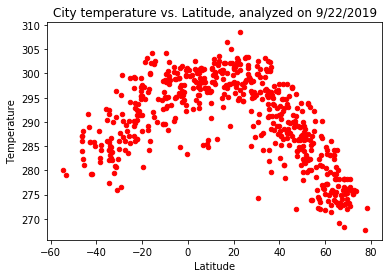

In [30]:
df.plot(x= 'Latitude', y= 'Temperature', kind= 'scatter', color= 'r',title= 'City temperature vs. Latitude, analyzed on 9/22/2019')

#### Latitude vs. Humidity Plot

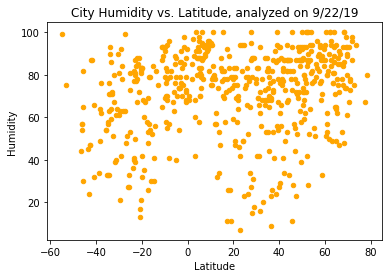

In [31]:
df.plot(x= 'Latitude', y= 'Humidity', kind= 'scatter', color= 'orange', title= 'City Humidity vs. Latitude, analyzed on 9/22/19')

#### Latitude vs. Cloudiness Plot

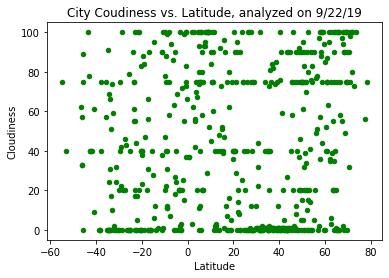

In [32]:
df.plot(x= 'Latitude', y= 'Cloudiness', kind= 'scatter', color= 'g', title= "City Coudiness vs. Latitude, analyzed on 9/22/19")

#### Latitude vs. Wind Speed Plot

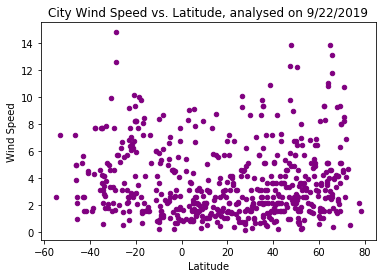

In [33]:
df.plot(x= 'Latitude', y= 'Wind Speed', kind= 'scatter', color= 'purple', title= 'City Wind Speed vs. Latitude, analysed on 9/22/2019')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [37]:
# Create Northern and Southern Hemisphere DataFrames
df = pd.read_csv('city_data.csv')
Northern_df = df.loc[(df['Latitude']>0), ['Latitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']]
Southern_df = df.loc[(df['Latitude']<0), ['Latitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']]

Northern_df.reset_index().head()
Southern_df.reset_index().head()

index  Latitude  Max Temperature  Humidity  Cloudiness  Wind Speed
0      2    -54.81           280.15        99          75        2.60
1      4    -33.21           283.70        72          74        3.78
2      5     -0.74           294.15        68          75        7.70
3      8    -20.07           297.60        42          38        5.90
4      9    -20.01           295.37        83          40        8.20

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Northern Hemisphere Max Temperature')

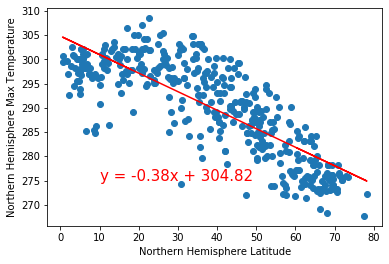

In [53]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (10,275), fontsize=15, color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Max Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Southern Hemisphere Max Temperature')

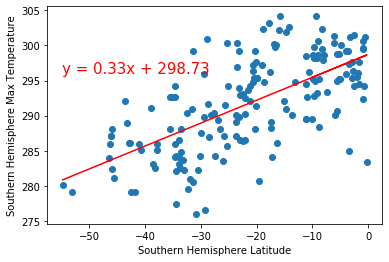

In [60]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Max Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,296), fontsize=15, color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Max Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Northern Hemisphere Humidity')

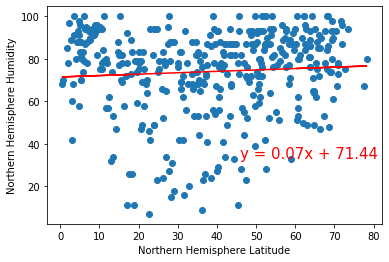

In [66]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (46,33), fontsize=15, color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Southern Hemisphere Humidity (%)')

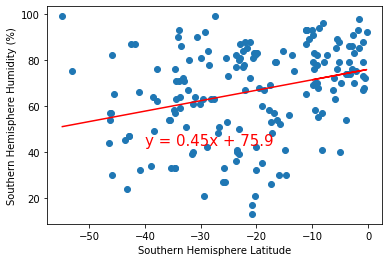

In [71]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-40,43), fontsize=15, color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Northern Hemisphere Cloudiness (%)')

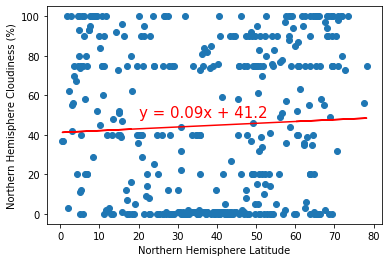

In [75]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (20,49), fontsize=15, color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Southern Hemisphere Cloudiness (%)')

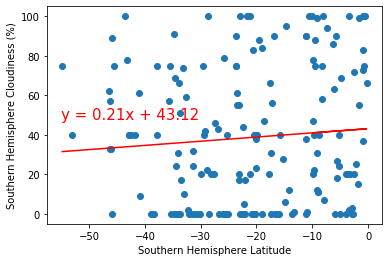

In [79]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-55,48), fontsize=15, color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Northern Hemisphere Wind Speed (mph)')

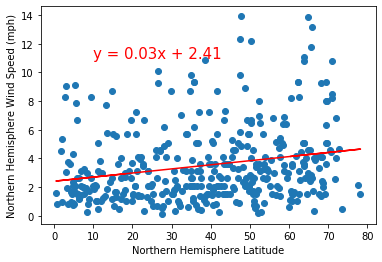

In [85]:
x_value = Northern_df['Latitude']
y_value = Northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (10,11), fontsize=15, color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Northern Hemisphere Wind Speed (mph)')

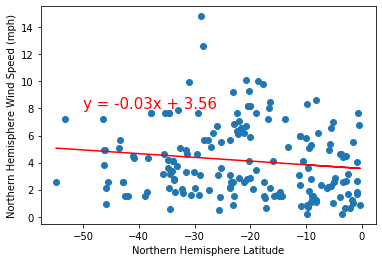

In [89]:
x_value = Southern_df['Latitude']
y_value = Southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x= x_value, y= y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (-50,8), fontsize=15, color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northern Hemisphere Wind Speed (mph)')